In [1]:
import pandas as pd

df_2021 = pd.read_csv('혼잡도_2021_위치포함.csv')
df_2022 = pd.read_csv('혼잡도_2022_위치포함.csv')
df_2023 = pd.read_csv('혼잡도_2023_위치포함.csv')

all_df = pd.concat([df_2021, df_2022, df_2023], ignore_index=True)

In [42]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns

# 한글 폰트 설정 (Windows용)
plt.rcParams['font.family'] = 'Pretendard'
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 깨짐 방지

In [9]:
df_2022 = df_2022.rename(columns={
    'ta': 'TMP',        # 기온
    'ws': 'WSD',        # 풍속
    'wd': 'VEC',        # 풍향
    'hm': 'REH',        # 상대습도
    'rn_day': 'PCP_day',# 일 강수량
    'rn_hr1': 'PCP'     # 1시간 강수량
})

In [10]:
df_2022

,tm,line,station_number,station_name,direction,stn,TMP,VEC,WSD,PCP_day,...,congestion,year,month,day,hour,datetime,nx,ny,point_x,point_y
0,2022010100,1,150,서울역,상선,419,-9.4,61.0,3.5,0.0,...,0,2022,1,1,0,2022-01-01 00:00:00,60.0,126.0,126.972317,37.555946
1,2022010100,1,150,서울역,상선,419,-9.4,61.0,3.5,0.0,...,0,2022,1,1,0,2022-01-01 00:00:00,60.0,126.0,126.972317,37.555946
2,2022010100,1,150,서울역,상선,419,-9.4,61.0,3.5,0.0,...,0,2022,1,1,0,2022-01-01 00:00:00,60.0,126.0,126.972317,37.555946
3,2022010100,1,150,서울역,상선,419,-9.4,61.0,3.5,0.0,...,0,2022,1,1,0,2022-01-01 00:00:00,60.0,126.0,126.972317,37.555946
4,2022010101,1,150,서울역,상선,419,-9.4,39.4,2.0,0.0,...,0,2022,1,1,1,2022-01-01 01:00:00,60.0,126.0,126.972317,37.555946
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8058658,2022123119,8,2828,남위례,하선,572,-1.6,199.0,0.2,0.0,...,19,2022,12,31,19,2022-12-31 19:00:00,63.0,124.0,127.139064,37.462856
8058659,2022123120,8,2828,남위례,하선,572,-2.6,0.0,0.0,0.0,...,16,2022,12,31,20,2022-12-31 20:00:00,63.0,124.0,127.139064,37.462856
8058660,2022123121,8,2828,남위례,하선,572,-2.9,17.0,0.0,0.0,...,21,2022,12,31,21,2022-12-31 21:00:00,63.0,124.0,127.139064,37.462856
8058661,2022123122,8,2828,남위례,하선,572,-3.1,185.3,0.1,0.0,...,20,2022,12,31,22,2022-12-31 22:00:00,63.0,124.0,127.139064,37.462856


In [74]:
import pandas as pd

# 1. 파일 불러오기
file_path = '정제_예보_2023.csv'
df_f2023 = pd.read_csv(file_path)

# 2. datetime 변환
df_f2023['datetime'] = pd.to_datetime(df_f2023['datetime'])

# 3. 보간 대상 변수
interpolate_cols = ['TMP', 'POP', 'PTY', 'REH', 'SKY', 'PCP', 'WSD']

# 4. 그룹별로 1시간 리샘플링 + time 보간 적용
interpolated_list = []

for (nx, ny), group in df_f2023.groupby(['nx', 'ny']):
    group = group.set_index('datetime').sort_index()
    resampled = group[interpolate_cols].resample('1H').mean()
    interpolated = resampled.interpolate(method='time')
    interpolated['nx'] = nx
    interpolated['ny'] = ny
    interpolated_list.append(interpolated)

# 5. 병합
df_interpolated_2023 = pd.concat(interpolated_list).reset_index()

# 6. year, month, day, hour 추가
df_interpolated_2023['year'] = df_interpolated_2023['datetime'].dt.year
df_interpolated_2023['month'] = df_interpolated_2023['datetime'].dt.month
df_interpolated_2023['day'] = df_interpolated_2023['datetime'].dt.day
df_interpolated_2023['hour'] = df_interpolated_2023['datetime'].dt.hour

# 7. 결과 미리보기
df_interpolated_2023.head()


C:\Users\somee\AppData\Local\Temp\ipykernel_24120\2512009814.py:18: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  resampled = group[interpolate_cols].resample('1H').mean()
C:\Users\somee\AppData\Local\Temp\ipykernel_24120\2512009814.py:18: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  resampled = group[interpolate_cols].resample('1H').mean()
C:\Users\somee\AppData\Local\Temp\ipykernel_24120\2512009814.py:18: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  resampled = group[interpolate_cols].resample('1H').mean()
C:\Users\somee\AppData\Local\Temp\ipykernel_24120\2512009814.py:18: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  resampled = group[interpolate_cols].resample('1H').mean()
C:\Users\somee\AppData\Local\Temp\ipykernel_24120\2512009814.py:18: FutureWarning: 'H' is deprec

,datetime,TMP,POP,PTY,REH,SKY,PCP,WSD,nx,ny,year,month,day,hour
0,2023-01-01 02:00:00,-99.0,-99.0,0.0,-99.0,1.0,-99.0,4.500000,50,119,2023,1,1,2
1,2023-01-01 03:00:00,-99.0,-99.0,0.0,-99.0,1.0,-99.0,4.033333,50,119,2023,1,1,3
2,2023-01-01 04:00:00,-99.0,-99.0,0.0,-99.0,1.0,-99.0,3.566667,50,119,2023,1,1,4
3,2023-01-01 05:00:00,-99.0,-99.0,0.0,-99.0,1.0,-99.0,3.100000,50,119,2023,1,1,5
4,2023-01-01 06:00:00,-99.0,-99.0,0.0,-99.0,1.0,-99.0,3.333333,50,119,2023,1,1,6


In [75]:
import numpy as np

# -99 값을 NaN으로 변환
df_interpolated_2023[interpolate_cols] = df_interpolated_2023[interpolate_cols].replace(-99, np.nan)

In [76]:
df_interpolated_2023

,datetime,TMP,POP,PTY,REH,SKY,PCP,WSD,nx,ny,year,month,day,hour
0,2023-01-01 02:00:00,NaN,NaN,0.000000,NaN,1.0,NaN,4.500000,50,119,2023,1,1,2
1,2023-01-01 03:00:00,NaN,NaN,0.000000,NaN,1.0,NaN,4.033333,50,119,2023,1,1,3
2,2023-01-01 04:00:00,NaN,NaN,0.000000,NaN,1.0,NaN,3.566667,50,119,2023,1,1,4
3,2023-01-01 05:00:00,NaN,NaN,0.000000,NaN,1.0,NaN,3.100000,50,119,2023,1,1,5
4,2023-01-01 06:00:00,NaN,NaN,0.000000,NaN,1.0,NaN,3.333333,50,119,2023,1,1,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2531057,2023-12-31 19:00:00,NaN,NaN,0.333333,NaN,4.0,NaN,14.700000,66,135,2023,12,31,19
2531058,2023-12-31 20:00:00,NaN,NaN,0.000000,NaN,4.0,NaN,14.000000,66,135,2023,12,31,20
2531059,2023-12-31 21:00:00,NaN,NaN,0.000000,NaN,4.0,NaN,13.533333,66,135,2023,12,31,21
2531060,2023-12-31 22:00:00,NaN,NaN,0.000000,NaN,4.0,NaN,13.066667,66,135,2023,12,31,22


In [77]:
# 예보 변수만 _f 접미사 붙이기
forecast_vars = ['TMP', 'POP', 'PTY', 'REH', 'SKY', 'PCP', 'WSD', 'VEC']
rename_dict = {col: col + '_f' for col in forecast_vars if col in df_interpolated_2023.columns}

df_interpolated_2023 = df_interpolated_2023.rename(columns=rename_dict)

In [78]:
df_interpolated_2023

,datetime,TMP_f,POP_f,PTY_f,REH_f,SKY_f,PCP_f,WSD_f,nx,ny,year,month,day,hour
0,2023-01-01 02:00:00,NaN,NaN,0.000000,NaN,1.0,NaN,4.500000,50,119,2023,1,1,2
1,2023-01-01 03:00:00,NaN,NaN,0.000000,NaN,1.0,NaN,4.033333,50,119,2023,1,1,3
2,2023-01-01 04:00:00,NaN,NaN,0.000000,NaN,1.0,NaN,3.566667,50,119,2023,1,1,4
3,2023-01-01 05:00:00,NaN,NaN,0.000000,NaN,1.0,NaN,3.100000,50,119,2023,1,1,5
4,2023-01-01 06:00:00,NaN,NaN,0.000000,NaN,1.0,NaN,3.333333,50,119,2023,1,1,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2531057,2023-12-31 19:00:00,NaN,NaN,0.333333,NaN,4.0,NaN,14.700000,66,135,2023,12,31,19
2531058,2023-12-31 20:00:00,NaN,NaN,0.000000,NaN,4.0,NaN,14.000000,66,135,2023,12,31,20
2531059,2023-12-31 21:00:00,NaN,NaN,0.000000,NaN,4.0,NaN,13.533333,66,135,2023,12,31,21
2531060,2023-12-31 22:00:00,NaN,NaN,0.000000,NaN,4.0,NaN,13.066667,66,135,2023,12,31,22


In [ ]:
# datetime과 nx, ny 기준으로 병합
merged_df = pd.merge(df_2023, df_interpolated_2023, on=['datetime', 'nx', 'ny'], how='left')

ValueError: You are trying to merge on object and datetime64[ns] columns for key 'datetime'. If you wish to proceed you should use pd.concat

In [80]:
df_2023['datetime'] = pd.to_datetime(df_2023['datetime'])

In [ ]:
df_2023

,tm,line,station_number,station_name,direction,stn,TMP,VEC,WSD,PCP_day,...,congestion,year,month,day,hour,datetime,nx,ny,point_x,point_y
0,2022010100,1,150,서울역,상선,419,-9.4,61.0,3.5,0.0,...,0,2022,1,1,0,2022-01-01 00:00:00,60.0,126.0,126.972317,37.555946
1,2022010100,1,150,서울역,상선,419,-9.4,61.0,3.5,0.0,...,0,2022,1,1,0,2022-01-01 00:00:00,60.0,126.0,126.972317,37.555946
2,2022010100,1,150,서울역,상선,419,-9.4,61.0,3.5,0.0,...,0,2022,1,1,0,2022-01-01 00:00:00,60.0,126.0,126.972317,37.555946
3,2022010100,1,150,서울역,상선,419,-9.4,61.0,3.5,0.0,...,0,2022,1,1,0,2022-01-01 00:00:00,60.0,126.0,126.972317,37.555946
4,2022010101,1,150,서울역,상선,419,-9.4,39.4,2.0,0.0,...,0,2022,1,1,1,2022-01-01 01:00:00,60.0,126.0,126.972317,37.555946
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8058658,2022123119,8,2828,남위례,하선,572,-1.6,199.0,0.2,0.0,...,19,2022,12,31,19,2022-12-31 19:00:00,63.0,124.0,127.139064,37.462856
8058659,2022123120,8,2828,남위례,하선,572,-2.6,0.0,0.0,0.0,...,16,2022,12,31,20,2022-12-31 20:00:00,63.0,124.0,127.139064,37.462856
8058660,2022123121,8,2828,남위례,하선,572,-2.9,17.0,0.0,0.0,...,21,2022,12,31,21,2022-12-31 21:00:00,63.0,124.0,127.139064,37.462856
8058661,2022123122,8,2828,남위례,하선,572,-3.1,185.3,0.1,0.0,...,20,2022,12,31,22,2022-12-31 22:00:00,63.0,124.0,127.139064,37.462856


In [83]:
merged_df = pd.merge(df_2023, df_interpolated_2023, on=['datetime', 'nx', 'ny'], how='left')
merged_df

,tm,line,station_number,station_name,direction,stn,ta,wd,ws,rn_day,...,POP_f,PTY_f,REH_f,SKY_f,PCP_f,WSD_f,year_y,month_y,day_y,hour_y
0,2023010100,1,150,서울역,상선,419,0.3,318.0,3.4,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2023010100,1,150,서울역,상선,419,0.3,318.0,3.4,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2023010100,1,150,서울역,상선,419,0.3,318.0,3.4,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2023010100,1,150,서울역,상선,419,0.3,318.0,3.4,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2023010101,1,150,서울역,상선,419,0.6,293.8,3.4,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8272815,2023123119,8,2828,남위례,하선,572,0.6,0.0,0.0,7.0,...,NaN,1.000000,NaN,4.0,NaN,14.000000,2023.0,12.0,31.0,19.0
8272816,2023123120,8,2828,남위례,하선,572,0.0,354.7,0.0,7.0,...,NaN,1.000000,NaN,4.0,NaN,13.400000,2023.0,12.0,31.0,20.0
8272817,2023123121,8,2828,남위례,하선,572,-0.6,0.0,0.0,7.0,...,NaN,0.666667,NaN,4.0,NaN,13.333333,2023.0,12.0,31.0,21.0
8272818,2023123122,8,2828,남위례,하선,572,-0.8,0.0,0.0,7.0,...,NaN,0.333333,NaN,4.0,NaN,13.266667,2023.0,12.0,31.0,22.0


In [19]:
# 혼잡도 데이터에서 중복 확인
dup1 = df_2022.duplicated(subset=['datetime', 'nx', 'ny']).sum()
print(f"❗ df_2022에서 중복된 (datetime, nx, ny): {dup1}건")

# 예보 데이터에서 중복 확인
dup2 = df_interpolated.duplicated(subset=['datetime', 'nx', 'ny']).sum()
print(f"❗ df_interpolated에서 중복된 (datetime, nx, ny): {dup2}건")


❗ df_2022에서 중복된 (datetime, nx, ny): 7567704건
❗ df_interpolated에서 중복된 (datetime, nx, ny): 0건


In [23]:
df_interpolated[['datetime', 'nx', 'ny']].drop_duplicates().shape[0]

2531062

In [22]:
df_2022[['datetime', 'nx', 'ny']].drop_duplicates().shape[0]

490959

In [25]:
# 병합 후 row 수
len(merged_df)

8058663

In [26]:
# 병합 전 혼잡도 row 수
len(df_2022)

8058663

In [84]:
merged_df = merged_df.replace(-99, np.nan)

In [86]:
def label_pty(code):
    mapping = {
        0: '없음',
        1: '비',
        2: '비/눈',
        3: '눈',
        4: '소나기',
        5: '빗방울',
        6: '눈날림'
    }
    return mapping.get(code, '기타')

merged_df['PTY_f_label'] = merged_df['PTY_f'].apply(label_pty)

In [87]:
merged_df.groupby('PTY_f_label')['congestion'].mean().sort_values(ascending=False)

PTY_f_label
기타     25.996384
없음     25.741472
소나기    25.377307
비      24.398726
눈      22.941330
비/눈    19.666952
Name: congestion, dtype: float64

In [88]:
merged_df['PTY_f'].value_counts(dropna=False).sort_index()

PTY_f
-66.000000       2076
-33.000000       2076
 0.000000     6897452
 0.333333       69276
 0.333333       71242
 0.666667       70440
 0.666667       72644
 1.000000      479292
 1.333333        8746
 1.333333        8346
 1.666667         764
 1.666667         142
 2.000000       15172
 2.333333         146
 2.333333         624
 2.666667        7536
 2.666667        6854
 3.000000       43378
 4.000000       13220
 NaN           503394
Name: count, dtype: int64

In [89]:
def infer_precip(row):
    if not pd.isna(row['PTY_f']):
        return row['PTY_f_label']  # 기존 값 유지
    if row['PCP_f'] > 0:
        return '비'  # 실제로 비가 내림
    elif row['POP_f'] >= 60 and row['SKY_f'] >= 3:
        return '비 가능성 높음'
    else:
        return '없음'

merged_df['강수판단'] = merged_df.apply(infer_precip, axis=1)

In [90]:
merged_df['강수판단'].value_counts()

강수판단
없음     7400846
비       479292
기타      320912
눈        43378
비/눈      15172
소나기      13220
Name: count, dtype: int64

In [91]:
merged_df.groupby('강수판단')['congestion'].mean().sort_values(ascending=False)

강수판단
없음     25.840424
소나기    25.377307
비      24.398726
기타     24.114224
눈      22.941330
비/눈    19.666952
Name: congestion, dtype: float64

In [92]:
merged_df = merged_df[merged_df['강수판단'] != '기타']

In [93]:
merged_df['hour'] = merged_df['datetime'].dt.hour


In [94]:
merged_df[merged_df['hour'].between(7, 9)].groupby('강수판단')['congestion'].mean().sort_values(ascending=False)

강수판단
소나기    47.906250
없음     33.910888
비      33.454144
눈      24.227137
비/눈    19.801463
Name: congestion, dtype: float64

In [95]:
# 요일 (0=월, ..., 6=일)
merged_df['weekday'] = merged_df['datetime'].dt.weekday

# 평일 / 주말 구분
merged_df['is_weekend'] = merged_df['weekday'].isin([5, 6])

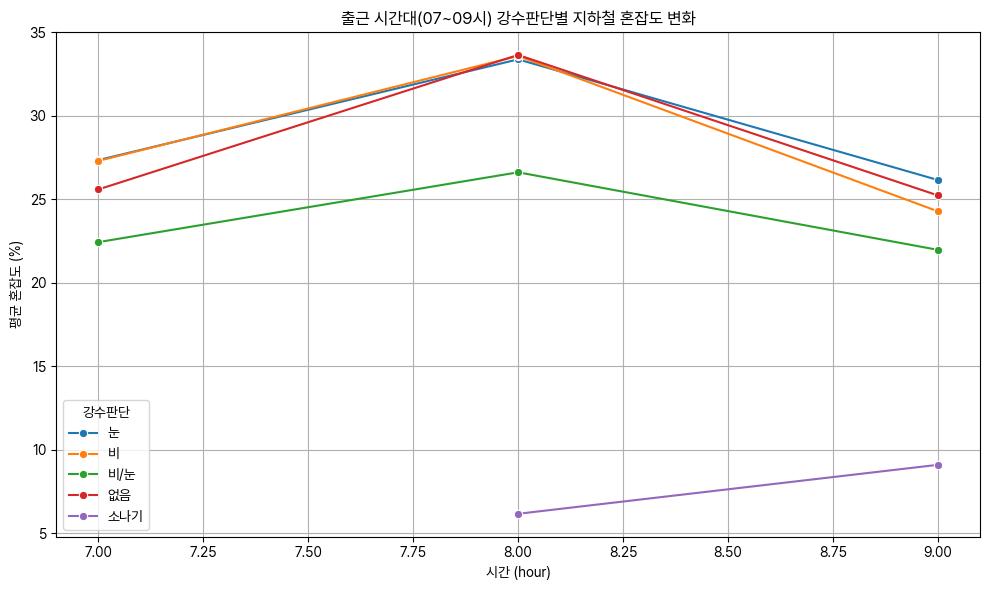

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. 출근 시간대만 필터링
rush_hour_df = merged_df[
    (merged_df['datetime'].dt.hour.between(7, 9)) &
    (merged_df['강수판단'].notna())
].copy()

# 2. hour 컬럼 생성
rush_hour_df['hour'] = rush_hour_df['datetime'].dt.hour

# 3. 시간대별 혼잡도 평균 계산
grouped = rush_hour_df.groupby(['hour', '강수판단'])['congestion'].mean().reset_index()

# 4. 시각화
plt.figure(figsize=(10, 6))
sns.lineplot(data=grouped, x='hour', y='congestion', hue='강수판단', marker='o')
plt.title("출근 시간대(07~09시) 강수판단별 지하철 혼잡도 변화")
plt.xlabel("시간 (hour)")
plt.ylabel("평균 혼잡도 (%)")

plt.grid(True)
plt.legend(title="강수판단")
plt.tight_layout()
plt.show()

In [97]:
merged_df['강수판단_통합'] = merged_df['강수판단'].replace({'소나기': '비'})

In [98]:
merged_df.to_csv('merge_df_2023.csv', index=False, encoding='utf-8-sig')

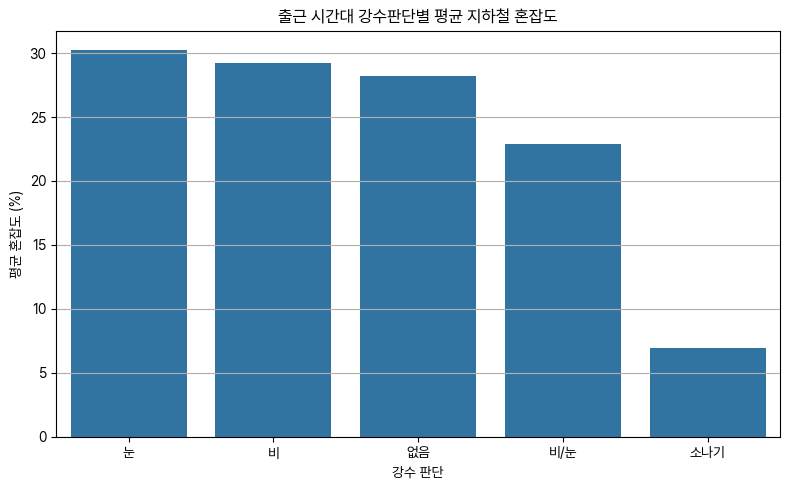

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

# 출근 시간대 필터링
rush_hour_df = merged_df[(merged_df['datetime'].dt.hour.between(7, 9)) & (merged_df['강수판단'].notna())].copy()

# 강수판단별 혼잡도 평균
grouped = rush_hour_df.groupby('강수판단')['congestion'].mean().reset_index()

# 막대그래프 시각화
plt.figure(figsize=(8, 5))
sns.barplot(data=grouped, x='강수판단', y='congestion', order=grouped.sort_values('congestion', ascending=False)['강수판단'])
plt.title("출근 시간대 강수판단별 평균 지하철 혼잡도")
plt.xlabel("강수 판단")
plt.ylabel("평균 혼잡도 (%)")
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [53]:
color_map = {
    '없음': '#333333',     # 진한 회색 (중심)
    '비': '#5797F7',       # 파랑 (강조)
    '눈': '#5797F7',       # 파랑 (강조)
    '비/눈': '#CCCCCC',    # 연한 회색 (보조)
    '소나기': '#CCCCCC'    # 연한 회색 (보조)
}

C:\Users\somee\AppData\Local\Temp\ipykernel_24120\1386232391.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


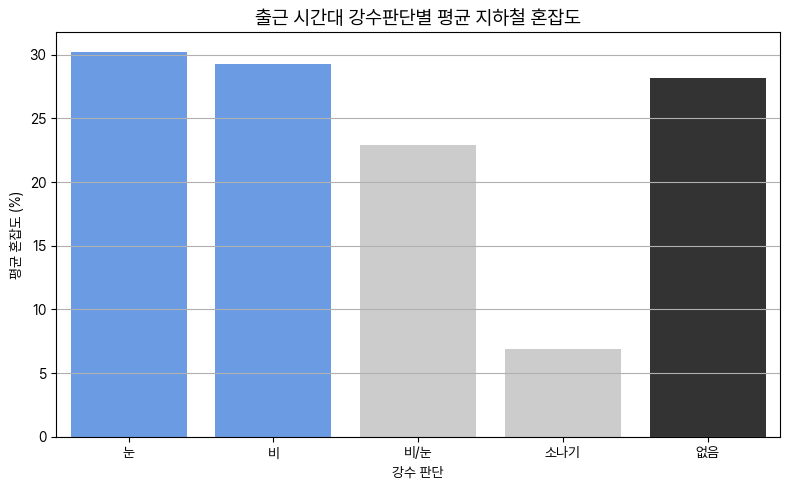

In [54]:
plt.figure(figsize=(8, 5))
sns.barplot(
    data=grouped,
    x='강수판단', y='congestion',
    palette=color_map
)
plt.title("출근 시간대 강수판단별 평균 지하철 혼잡도", fontsize=14)
plt.xlabel("강수 판단")
plt.ylabel("평균 혼잡도 (%)")
plt.grid(axis='y')
plt.tight_layout()
plt.show()

C:\Users\somee\AppData\Local\Temp\ipykernel_24120\2134377352.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


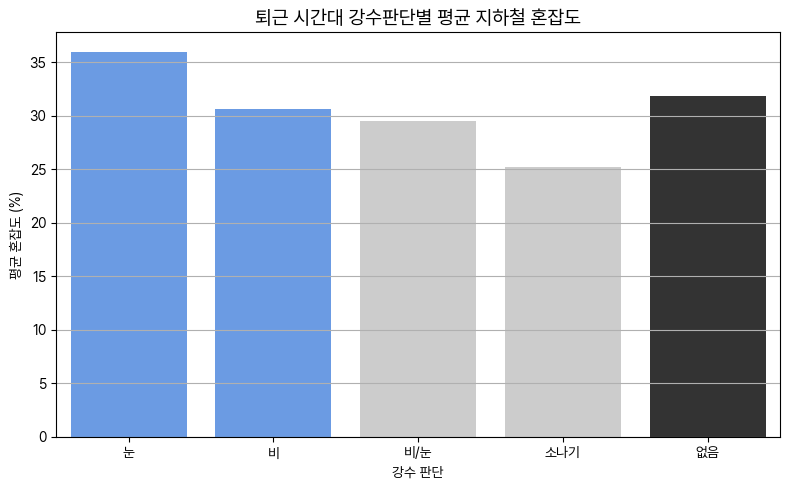

In [55]:
# 1. 퇴근 시간대만 필터링
evening_df = merged_df[
    (merged_df['datetime'].dt.hour.between(17, 19)) &
    (merged_df['강수판단'].notna())
].copy()

# 2. 강수판단별 평균 혼잡도 계산
grouped_evening = evening_df.groupby('강수판단')['congestion'].mean().reset_index()

# 3. 컬러 맵 재사용
color_map = {
    '없음': '#333333',     # 진한 회색 (중심)
    '비': '#5797F7',       # 파랑 (강조)
    '눈': '#5797F7',       # 파랑 (강조)
    '비/눈': '#CCCCCC',    # 연한 회색 (보조)
    '소나기': '#CCCCCC'    # 연한 회색 (보조)
}

# 4. 시각화
plt.figure(figsize=(8, 5))
sns.barplot(
    data=grouped_evening,
    x='강수판단', y='congestion',
    palette=color_map
)
plt.title("퇴근 시간대 강수판단별 평균 지하철 혼잡도", fontsize=14)
plt.xlabel("강수 판단")
plt.ylabel("평균 혼잡도 (%)")
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [56]:
# 출근 시간대 필터링
rush_hour_df = merged_df[
    (merged_df['datetime'].dt.hour.between(7, 9)) &
    (merged_df['강수판단'].notna())
].copy()

# 강수판단별 평균 혼잡도
grouped_rush = rush_hour_df.groupby('강수판단')['congestion'].mean().reset_index()

# 혼잡도 평균이 30% 이상인 조건만 보기
high_congestion_rush = grouped_rush[grouped_rush['congestion'] >= 30]
print(high_congestion_rush)

  강수판단  congestion
0    눈   30.255819


In [57]:
# 혼잡도 상위 역 추출
top_stations = merged_df.groupby('station_name')['congestion'].mean().sort_values(ascending=False).head(5)
print(top_stations)

station_name
구일     49.767995
오류동    43.990210
서초     42.144592
방배     42.105164
강남     40.258190
Name: congestion, dtype: float64


In [58]:
top_station_list = top_stations.index.tolist()

# 해당 역 데이터만 추출
top_df = merged_df[merged_df['station_name'].isin(top_station_list)]

In [59]:
grouped_top = top_df.groupby(['station_name', '강수판단'])['congestion'].mean().reset_index()

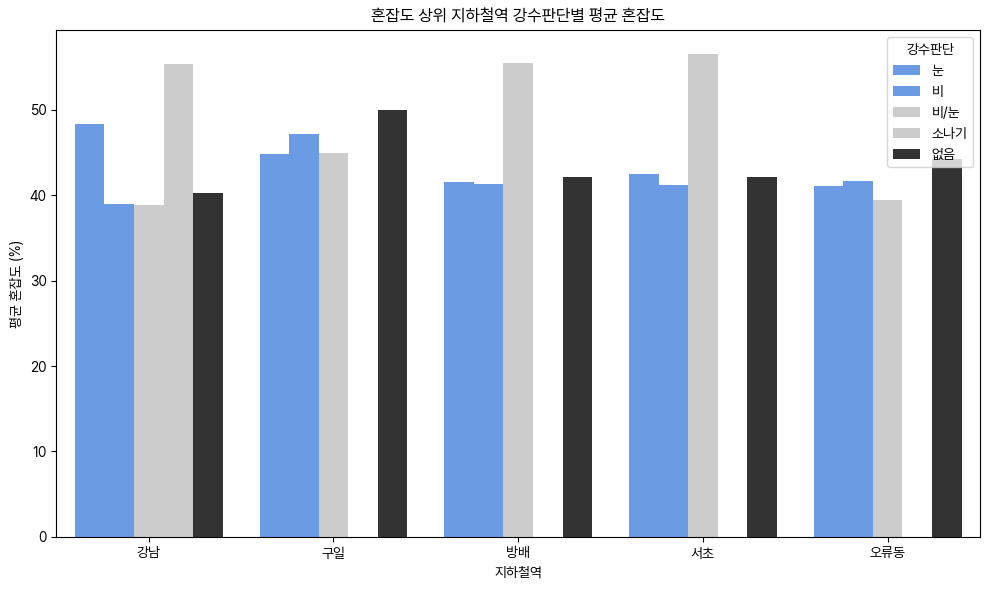

In [60]:
plt.figure(figsize=(10, 6))
sns.barplot(
    data=grouped_top,
    x='station_name', y='congestion', hue='강수판단', palette=color_map
)
plt.title("혼잡도 상위 지하철역 강수판단별 평균 혼잡도")
plt.xlabel("지하철역")
plt.ylabel("평균 혼잡도 (%)")
plt.legend(title="강수판단")
plt.tight_layout()
plt.show()

In [61]:
top_lines = merged_df.groupby('line')['congestion'].mean().sort_values(ascending=False).head(5)
top_line_list = top_lines.index.tolist()
top_line_df = merged_df[merged_df['line'].isin(top_line_list)]

In [62]:
grouped_top = top_line_df.groupby(['line', '강수판단'])['congestion'].mean().reset_index()

In [ ]:
line1_df = merged_df[merged_df['line'] == 1].copy()

In [65]:
grouped_by_station = line1_df.groupby(['station_name', 'direction'])['congestion'].mean().reset_index()

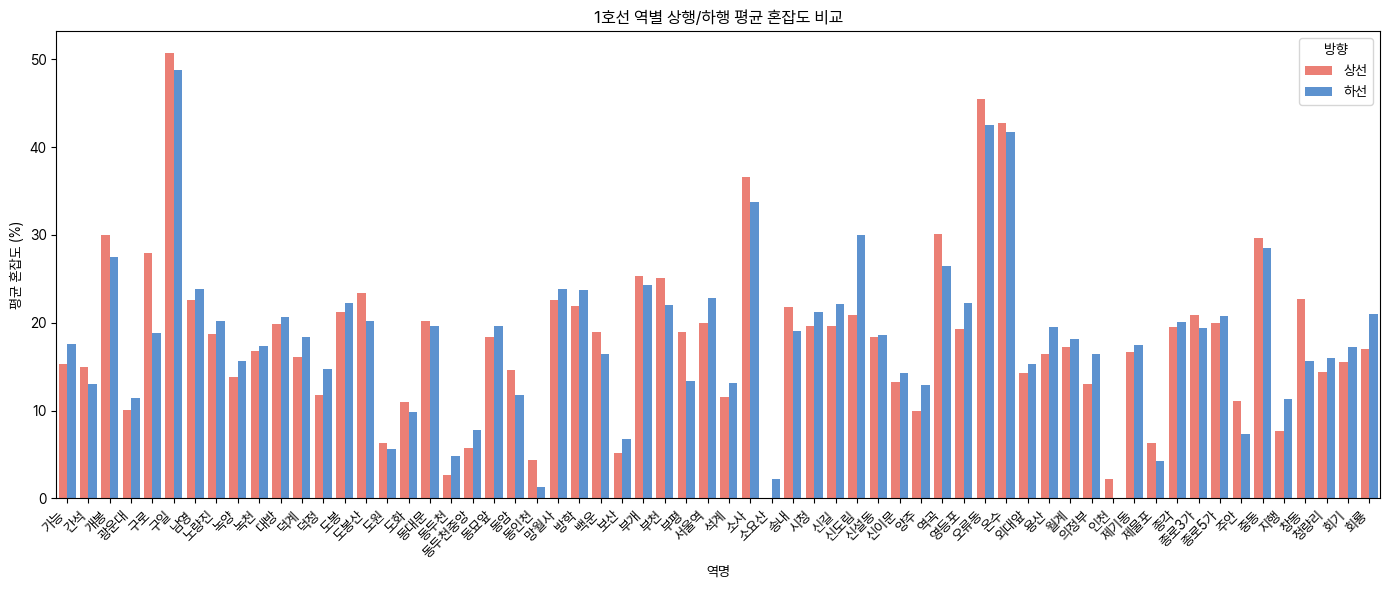

In [66]:
plt.figure(figsize=(14, 6))
sns.barplot(
    data=grouped_by_station,
    x='station_name', y='congestion',
    hue='direction', palette=['#FF6F61', '#4A90E2']  # 상선-빨강, 하선-파랑
)
plt.title("1호선 역별 상행/하행 평균 혼잡도 비교")
plt.xlabel("역명")
plt.ylabel("평균 혼잡도 (%)")
plt.xticks(rotation=45, ha='right')
plt.legend(title="방향")
plt.tight_layout()
plt.show()

In [67]:
# 시간대 구분 (출근: 7~9, 퇴근: 17~19)
merged_df['hour'] = merged_df['datetime'].dt.hour

def get_time_period(hour):
    if 7 <= hour <= 9:
        return '출근'
    elif 17 <= hour <= 19:
        return '퇴근'
    else:
        return '기타'

merged_df['시간대'] = merged_df['hour'].apply(get_time_period)

In [68]:
merged_df['weekday'] = merged_df['datetime'].dt.weekday  # 0=월 ~ 6=일
merged_df['요일'] = merged_df['weekday'].apply(lambda x: '주말' if x >= 5 else '평일')

In [69]:
# 시간대 ∩ 요일 ∩ 강수판단 별 평균 혼잡도
grouped = merged_df[
    merged_df['시간대'].isin(['출근', '퇴근']) &
    merged_df['강수판단'].notna()
].groupby(['시간대', '요일', '강수판단'])['congestion'].mean().reset_index()

C:\Users\somee\AppData\Local\Temp\ipykernel_24120\2267903191.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


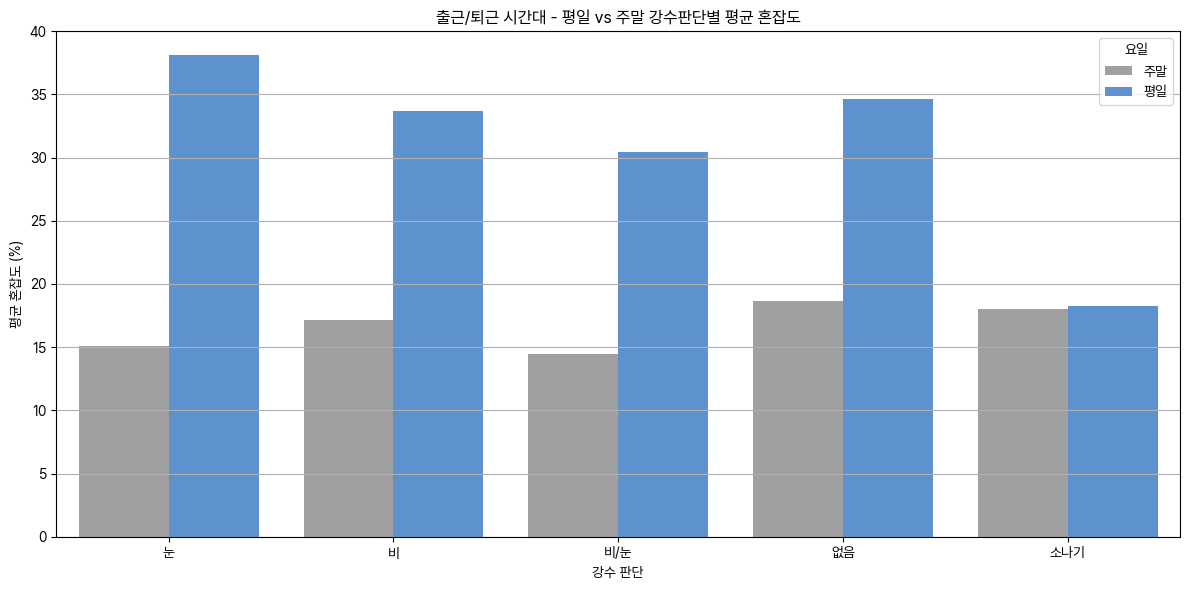

In [70]:
plt.figure(figsize=(12, 6))
sns.barplot(
    data=grouped,
    x='강수판단', y='congestion',
    hue='요일',
    palette={'평일': '#4A90E2', '주말': '#A0A0A0'},
    ci=None
)
plt.title("출근/퇴근 시간대 - 평일 vs 주말 강수판단별 평균 혼잡도")
plt.xlabel("강수 판단")
plt.ylabel("평균 혼잡도 (%)")
plt.grid(axis='y')
plt.legend(title="요일")
plt.tight_layout()
plt.show()

<Axes: xlabel='강수판단', ylabel='congestion'>

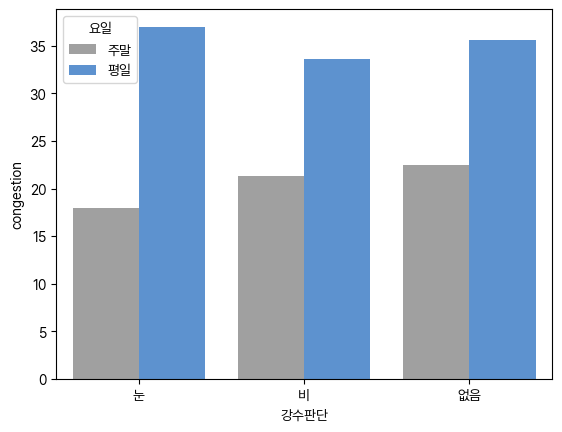

In [71]:
grouped = merged_df.groupby(['시간대', '요일', '강수판단'])['congestion'].mean().reset_index()

# 예: 퇴근 & 평일/주말 & 눈/비/없음만 보고 싶다면
filtered = grouped[
    (grouped['시간대'] == '퇴근') &
    (grouped['강수판단'].isin(['눈', '비', '없음']))
]

# 시각화
sns.barplot(
    data=filtered,
    x='강수판단', y='congestion', hue='요일',
    palette={'평일': '#4A90E2', '주말': '#A0A0A0'}
)

In [105]:
def classify_rain_condition(row):
    if row['PCP_f'] > 0:
        return '실제 강수'
    elif row['POP_f'] >= 60:
        return '비 예보만 있음'
    elif row['SKY_f'] >= 3:
        return '흐림'
    else:
        return '맑음'

merged_df['강수조건'] = merged_df.apply(classify_rain_condition, axis=1)

Text(0, 0.5, '평균 혼잡도 (%)')

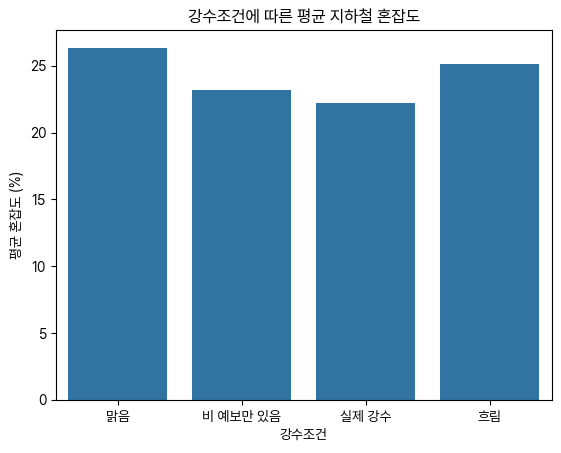

In [106]:
grouped = merged_df.groupby('강수조건')['congestion'].mean().reset_index()
sns.barplot(data=grouped, x='강수조건', y='congestion')
plt.title("강수조건에 따른 평균 지하철 혼잡도")
plt.ylabel("평균 혼잡도 (%)")

In [108]:
# -99 → NaN 처리 (이미 되어 있다면 생략 가능)
merged_df['PTY_f'] = merged_df['PTY_f'].replace(-99, np.nan)

# 강수 형태 라벨링 (이미 존재한다면 생략)
pty_map = {
    0: '없음',
    1: '비',
    2: '비/눈',
    3: '눈',
    4: '소나기'
}
merged_df['PTY_f_label'] = merged_df['PTY_f'].map(pty_map).fillna('기타')


In [109]:
grouped = merged_df.groupby('PTY_f_label')['congestion'].mean().reset_index().sort_values('congestion', ascending=False)
print(grouped)

  PTY_f_label  congestion
0          기타   27.196254
5          없음   25.741472
4         소나기   25.377307
2           비   24.398726
1           눈   22.941330
3         비/눈   19.666952


C:\Users\somee\AppData\Local\Temp\ipykernel_24120\1542929123.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


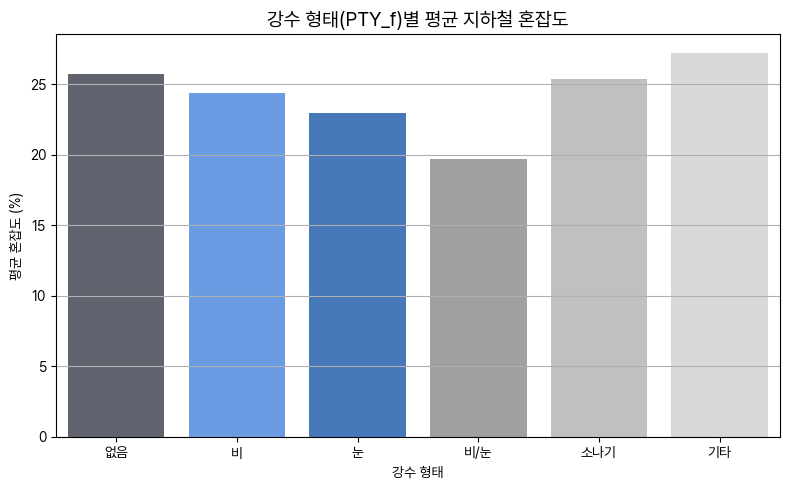

In [110]:
import matplotlib.pyplot as plt
import seaborn as sns

# 색상 팔레트 정의
color_map = {
    '없음': '#5E606F',   # 진한 회색
    '비': '#5797F7',     # 파랑
    '눈': '#3475CC',     # 진파랑
    '비/눈': '#A0A0A0',  # 연회색
    '소나기': '#C0C0C0',
    '기타': '#D8D8D8'
}

# 순서 정의
order = ['없음', '비', '눈', '비/눈', '소나기', '기타']

# 바 플롯 그리기
plt.figure(figsize=(8, 5))
sns.barplot(
    data=grouped,
    x='PTY_f_label', y='congestion',
    order=order,
    palette=color_map
)
plt.title("강수 형태(PTY_f)별 평균 지하철 혼잡도", fontsize=14)
plt.xlabel("강수 형태")
plt.ylabel("평균 혼잡도 (%)")
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [111]:
def classify_pcp(pcp):
    if pd.isna(pcp):
        return '결측'
    elif pcp == 0:
        return '0mm'
    elif pcp <= 1.0:
        return '1mm 이하'
    elif pcp <= 5.0:
        return '5mm 이하'
    elif pcp <= 10.0:
        return '10mm 이하'
    else:
        return '10mm 초과'

merged_df['강수량등급'] = merged_df['PCP_f'].apply(classify_pcp)

In [112]:
merged_df['강수조합'] = merged_df['PTY_f_label'] + ' + ' + merged_df['강수량등급']

In [113]:
grouped = merged_df.groupby('강수조합')['congestion'].mean().reset_index()
grouped = grouped.sort_values('congestion', ascending=False)

C:\Users\somee\AppData\Local\Temp\ipykernel_24120\672848989.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=grouped, x='강수조합', y='congestion', palette='Blues_d')


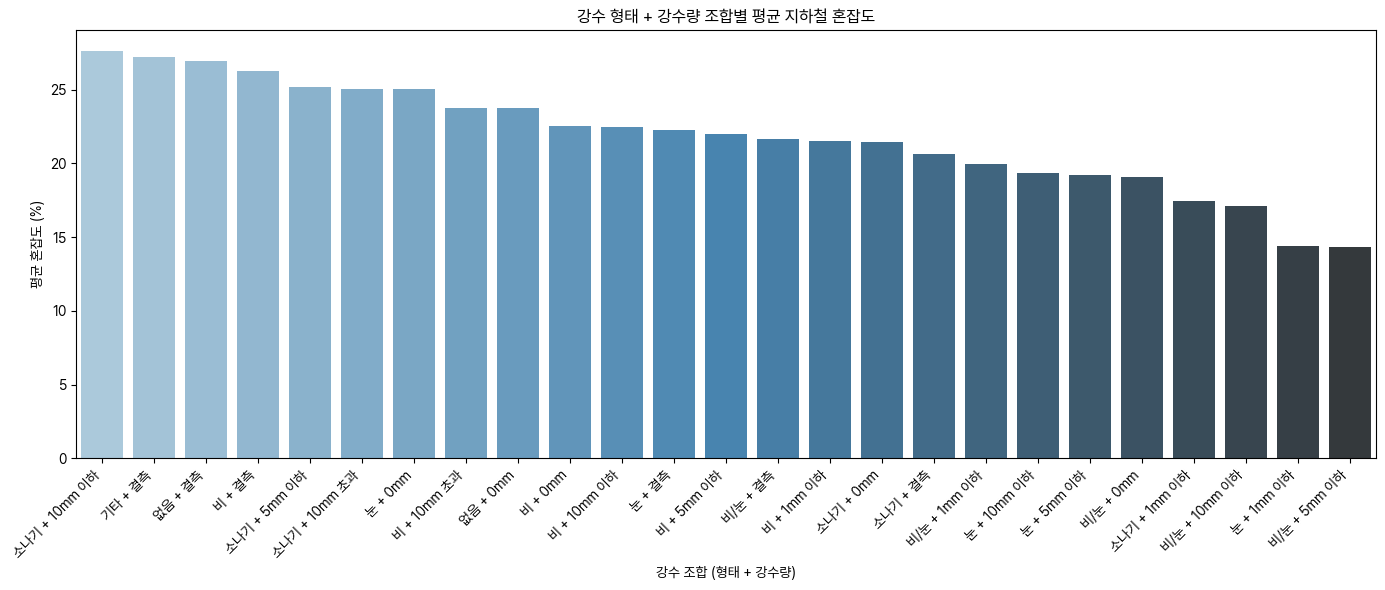

In [114]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 6))
sns.barplot(data=grouped, x='강수조합', y='congestion', palette='Blues_d')
plt.title("강수 형태 + 강수량 조합별 평균 지하철 혼잡도")
plt.xlabel("강수 조합 (형태 + 강수량)")
plt.ylabel("평균 혼잡도 (%)")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [115]:
def classify_pcp_updated(pcp):
    if pd.isna(pcp):
        return None  # 결측은 제거할 예정
    elif pcp == 0:
        return '없음'
    elif pcp < 3:
        return '약한 비'
    elif pcp < 15:
        return '보통 비'
    else:
        return '강한 비'

# 등급 컬럼 생성
merged_df['강수량등급'] = merged_df['PCP_f'].apply(classify_pcp_updated)

# 결측 제외
filtered_df = merged_df[
    merged_df[['PTY_f_label', '강수량등급', 'congestion']].notna().all(axis=1)
].copy()


In [116]:
filtered_df['강수조합'] = filtered_df['PTY_f_label'] + ' + ' + filtered_df['강수량등급']

grouped = filtered_df.groupby('강수조합')['congestion'].mean().reset_index()
grouped = grouped.sort_values('congestion', ascending=False)

C:\Users\somee\AppData\Local\Temp\ipykernel_24120\891312785.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=grouped, x='강수조합', y='congestion', palette='Blues_d')


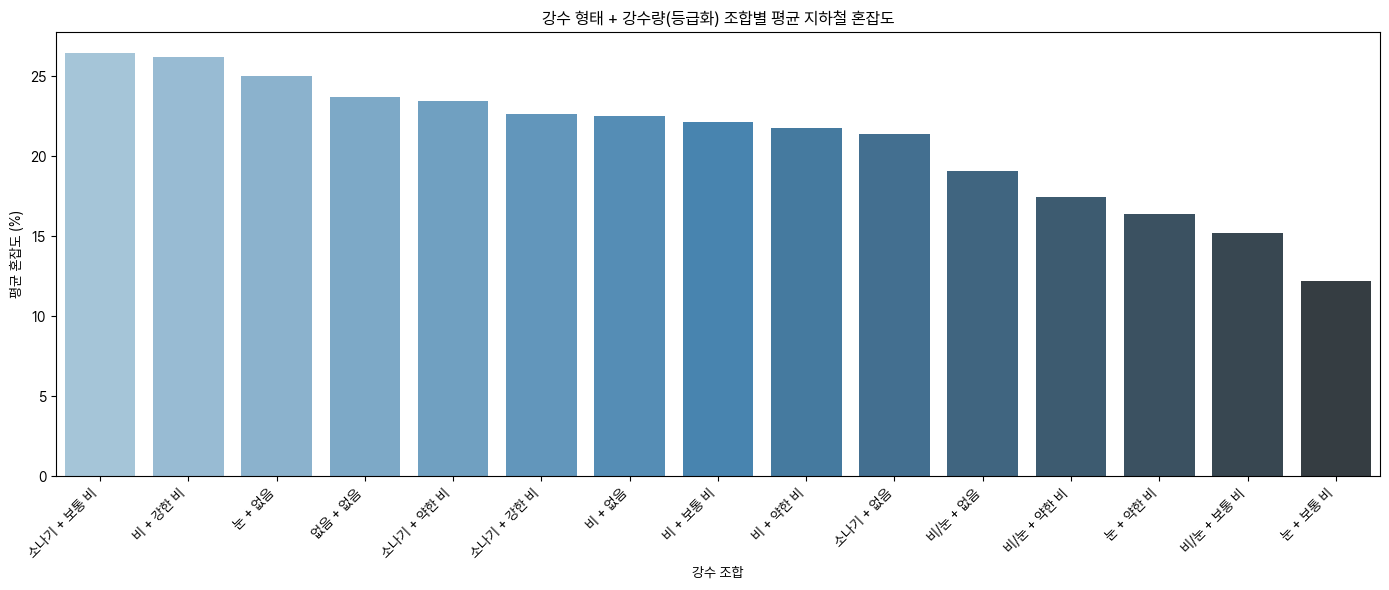

In [117]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 6))
sns.barplot(data=grouped, x='강수조합', y='congestion', palette='Blues_d')
plt.title("강수 형태 + 강수량(등급화) 조합별 평균 지하철 혼잡도")
plt.xlabel("강수 조합")
plt.ylabel("평균 혼잡도 (%)")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [118]:
def define_precip_group(row):
    pty = row['PTY_f']
    pcp = row['PCP_f']
    
    if pd.isna(pty) or pd.isna(pcp):
        return None  # 결측 제외

    # 강수 없음 = 실제로 비 안 옴
    if (pty == 0 or row['PTY_f_label'] == '없음') and pcp == 0:
        return '강수 없음'

    # 강수량 등급 구분
    if pcp < 0.1:
        pcp_grade = '약한 비'
    elif pcp < 3:
        pcp_grade = '약한 비'
    elif pcp < 15:
        pcp_grade = '보통 비'
    else:
        pcp_grade = '강한 비'
    
    # PTY 라벨 + 강수량 등급
    return f"{row['PTY_f_label']} + {pcp_grade}"

# 적용
merged_df['강수조합'] = merged_df.apply(define_precip_group, axis=1)

# 결측 제거
filtered_df = merged_df[merged_df['강수조합'].notna()]

In [119]:
grouped = (
    filtered_df
    .groupby('강수조합')['congestion']
    .mean()
    .reset_index()
    .sort_values(by='congestion', ascending=False)
)